In [1]:
import os
os.getcwd()

'/Users/obadaessa/Desktop/Python Codes'

In [2]:
os.chdir('/Users/obadaessa/Desktop/Internship/Data Sets')

In [3]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
## Space shuttle

challenger = pd.read_csv('challenger.csv')
challenger

,o_ring_ct,o_ring_fail,temperature,pressure,launch_id
0,6,0,66,50,1
1,6,1,70,50,2
2,6,0,69,50,3
3,6,0,68,50,4
4,6,0,67,50,5
5,6,0,72,50,6
6,6,0,73,100,7
7,6,0,70,100,8
8,6,1,57,200,9
9,6,1,63,200,10


In [5]:
orf = challenger['o_ring_fail']

In [6]:
orf

0     0
1     1
2     0
3     0
4     0
5     0
6     0
7     0
8     1
9     1
10    1
11    0
12    0
13    2
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    1
Name: o_ring_fail, dtype: int64

In [7]:
temp = challenger['temperature']

In [8]:
temp

0     66
1     70
2     69
3     68
4     67
5     72
6     73
7     70
8     57
9     63
10    70
11    78
12    67
13    53
14    67
15    75
16    70
17    81
18    76
19    79
20    75
21    76
22    58
Name: temperature, dtype: int64

Text(0.5, 0, 'Temperature')

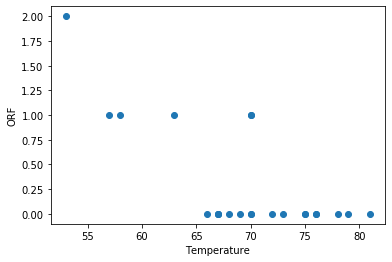

In [9]:
ax = plt.plot(temp, orf, 'o')
plt.ylabel('ORF')
plt.xlabel('Temperature')

In [10]:
challenger.corr()

,o_ring_ct,o_ring_fail,temperature,pressure,launch_id
o_ring_ct,NaN,NaN,NaN,NaN,NaN
o_ring_fail,NaN,1.000000,-0.725671,0.220326,-0.011993
temperature,NaN,-0.725671,1.000000,0.039818,0.230770
pressure,NaN,0.220326,0.039818,1.000000,0.839932
launch_id,NaN,-0.011993,0.230770,0.839932,1.000000


In [11]:
meanorf = challenger['o_ring_fail'].mean()

In [12]:
meanorf

0.30434782608695654

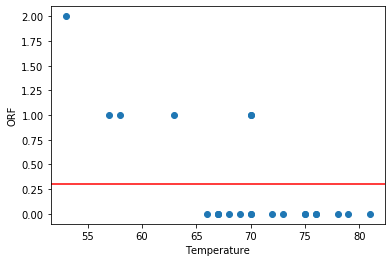

In [13]:
plt.plot(temp, orf, 'o')
plt.ylabel('ORF')
plt.xlabel('Temperature')
plt.axhline(meanorf, color='r', linestyle='-')
plt.show()

In [70]:
import statsmodels.api as sm

In [71]:
model = sm.OLS(orf, temp).fit() # OLS: Ordinary Least Squares

In [72]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            o_ring_fail   R-squared (uncentered):                   0.178
Model:                            OLS   Adj. R-squared (uncentered):              0.140
Method:                 Least Squares   F-statistic:                              4.755
Date:                Fri, 12 Jun 2020   Prob (F-statistic):                      0.0402
Time:                        16:21:51   Log-Likelihood:                         -19.595
No. Observations:                  23   AIC:                                      41.19
Df Residuals:                      22   BIC:                                      42.33
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
temperature     0.0038      0.002      2.181      0.040       0.000       0.007
==============================================================================
Omnibus:                       14.053   Durbin-Watson:                   1.851
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               12.853
Skew:                           1.623   Prob(JB):                      0.00162
Kurtosis:                       4.696   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Observation: when temp increases by 1, orf increases by 0.0038

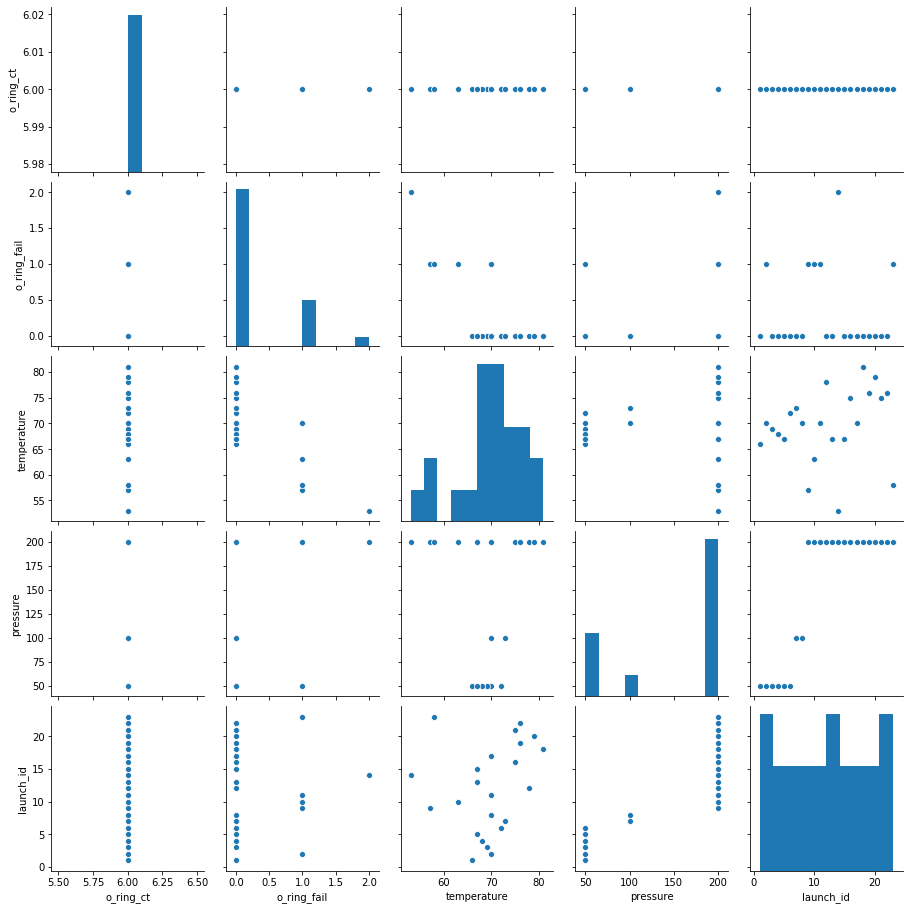

In [17]:
import seaborn as sns
sns.pairplot(challenger)

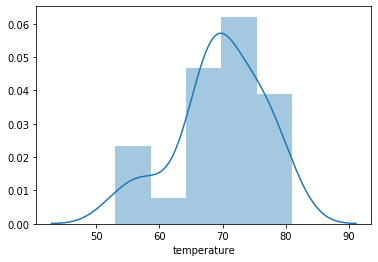

In [18]:
sns.distplot(challenger['temperature'])

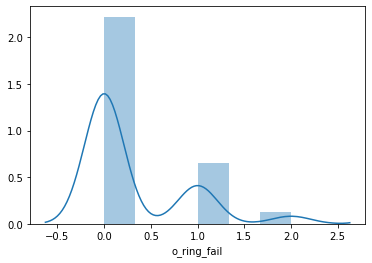

In [19]:
sns.distplot(challenger['o_ring_fail'])

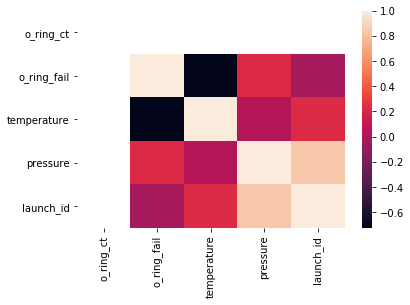

In [20]:
# Correlation using Heatmap

corr = challenger.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

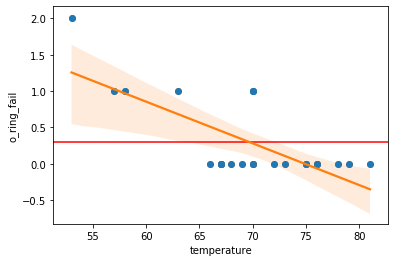

In [21]:
plt.plot(temp, orf, 'o')
plt.ylabel('ORF')
plt.xlabel('Temperature')
plt.axhline(meanorf, color='r', linestyle='-')
sns.regplot(x='temperature', y='o_ring_fail', data=challenger)

In [22]:
x = challenger['temperature']
y = challenger['o_ring_fail']

In [23]:
x, y

(0     66
 1     70
 2     69
 3     68
 4     67
 5     72
 6     73
 7     70
 8     57
 9     63
 10    70
 11    78
 12    67
 13    53
 14    67
 15    75
 16    70
 17    81
 18    76
 19    79
 20    75
 21    76
 22    58
 Name: temperature, dtype: int64,
 0     0
 1     1
 2     0
 3     0
 4     0
 5     0
 6     0
 7     0
 8     1
 9     1
 10    1
 11    0
 12    0
 13    2
 14    0
 15    0
 16    0
 17    0
 18    0
 19    0
 20    0
 21    0
 22    1
 Name: o_ring_fail, dtype: int64)

In [24]:
# Split data into training and test sets

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.4, random_state=1)

In [25]:
xtrain

6     73
7     70
1     70
14    67
0     66
15    75
22    58
21    76
9     63
8     57
12    67
11    78
5     72
Name: temperature, dtype: int64

In [26]:
ytrain

6     0
7     0
1     1
14    0
0     0
15    0
22    1
21    0
9     1
8     1
12    0
11    0
5     0
Name: o_ring_fail, dtype: int64

In [28]:
xtrain = xtrain.values.reshape((-1,1))

In [29]:
xtrain

array([[73],
       [70],
       [70],
       [67],
       [66],
       [75],
       [58],
       [76],
       [63],
       [57],
       [67],
       [78],
       [72]])

In [30]:
from sklearn import linear_model as lm
model = lm.LinearRegression()
result = model.fit(xtrain, ytrain)

In [31]:
accuracy = model.score(xtrain, ytrain)
print('Acc: ', accuracy)

Acc:  0.49669252207783493


In [32]:
print('intercept: ', model.intercept_)
print('slope: ', model.coef_)

intercept:  3.874282260501663
slope:  [-0.05197945]


In [33]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
xtest # 10x1

20    75
17    81
3     68
13    53
19    79
16    70
10    70
4     67
2     69
18    76
Name: temperature, dtype: int64

In [42]:
predictions = model.predict(xtest)
print('Predictions for ORF:', predections, sep='\n')

Predictions for ORF:
[-0.02417649 -0.33605319  0.33967966  1.11937141 -0.23209429  0.23572076
  0.23572076  0.39165911  0.28770021 -0.07615594]


In [43]:
ytest

20    0
17    0
3     0
13    2
19    0
16    0
10    1
4     0
2     0
18    0
Name: o_ring_fail, dtype: int64

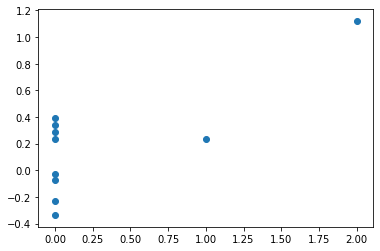

In [45]:
plt.scatter(ytest, predictions)

In [47]:
# Define new data instance

xnew = [[30]]
ynew = model.predict(xnew)
print('New temp=%s, Predict ORF=%s' %(xnew, ynew))

New temp=[[30]], Predict ORF=[2.31489876]


In [48]:
# Again

xnew = [[70]]
ynew = model.predict(xnew)
print('New temp=%s, Predict ORF=%s' %(xnew, ynew))

New temp=[[70]], Predict ORF=[0.23572076]


### Higher temps do not result in fails, while lower ones do

In [49]:
# Evaluating the models

from sklearn.metrics import mean_squared_error, r2_score

In [55]:
xtrain = xtrain.reshape(-1,1)
ytrainpredict = model.predict(xtrain)

In [56]:
xtest = xtest.reshape(-1,1)
ytestpredict = model.predict(xtest)

In [62]:
print('Intercept: ', model.intercept_)
print('Slope: ', model.coef_)

Intercept:  3.874282260501663
Slope:  [-0.05197945]


In [60]:
rmsetrain = (py.sqrt(mean_squared_error(ytrain, ytrainpredict)))
r2train = r2_score(ytrain, ytrainpredict)

print('Model Performance of training set\n-------\n')
print('RMSE is {}'.format(rmsetrain))
print('R2 score is {}'.format(r2train))

Model Performance of training set
-------

RMSE is 0.3274346152282803
R2 score is 0.4966925220778349


In [61]:
rmsetest = (py.sqrt(mean_squared_error(ytest, ytestpredict)))
r2test = r2_score(ytest, ytestpredict)

print('Model Performance of testing set\n-------\n')
print('RMSE is {}'.format(rmsetest))
print('R2 score is {}'.format(r2test))

Model Performance of testing set
-------

RMSE is 0.440446139764291
R2 score is 0.5268468243091089


Text(0, 0.5, 'ORF')

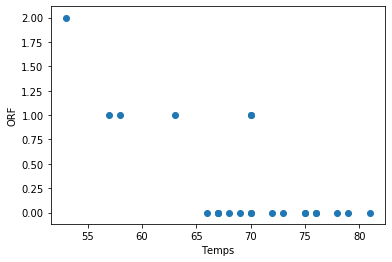

In [63]:
# Plotting values

plt.scatter(x, y)
plt.xlabel('Temps')
plt.ylabel('ORF')

In [65]:
x = x.values.reshape(-1,1)

In [66]:
ypredicted = model.predict(x)

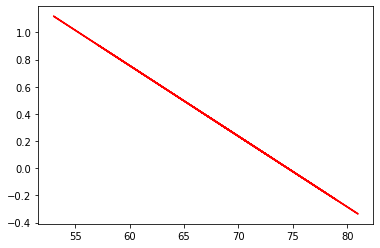

In [67]:
plt.plot(x, ypredicted, color='r')
plt.show()

# Multiple Linear Regression

In [68]:
x = challenger[['temperature', 'pressure']]
y = challenger['o_ring_fail']

In [74]:
model1 = sm.OLS(y,x).fit()
predections = model1.predict(x)
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            o_ring_fail   R-squared (uncentered):                   0.292
Model:                            OLS   Adj. R-squared (uncentered):              0.225
Method:                 Least Squares   F-statistic:                              4.333
Date:                Fri, 12 Jun 2020   Prob (F-statistic):                      0.0266
Time:                        16:22:17   Log-Likelihood:                         -17.873
No. Observations:                  23   AIC:                                      39.75
Df Residuals:                      21   BIC:                                      42.02
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
temperature    -0.0030      0.004     -0.745      0.465      -0.011       0.005
pressure        0.0031      0.002      1.842      0.080      -0.000       0.007
==============================================================================
Omnibus:                        8.717   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                6.616
Skew:                           1.239   Prob(JB):                       0.0366
Kurtosis:                       3.871   Cond. No.                         6.71
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Polynomial Regression

In [90]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.4, random_state=1)

# 0.6 for training

In [76]:
xtrain

,temperature,pressure
6,73,100
7,70,100
1,70,50
14,67,200
0,66,50
15,75,200
22,58,200
21,76,200
9,63,200
8,57,200


In [77]:
ytrain

6     0
7     0
1     1
14    0
0     0
15    0
22    1
21    0
9     1
8     1
12    0
11    0
5     0
Name: o_ring_fail, dtype: int64

In [78]:
features = xtrain.iloc[:,:].values

In [79]:
features

array([[ 73, 100],
       [ 70, 100],
       [ 70,  50],
       [ 67, 200],
       [ 66,  50],
       [ 75, 200],
       [ 58, 200],
       [ 76, 200],
       [ 63, 200],
       [ 57, 200],
       [ 67, 200],
       [ 78, 200],
       [ 72,  50]])

In [80]:
labels = ytrain.iloc[:].values
labels

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0])

In [81]:
x = features
y = labels

In [82]:
from sklearn import linear_model as lm

model = lm.LinearRegression()
results = model.fit(x,y)

In [83]:
predictions = model.predict(x)

In [84]:
# Check model accuracy

acc = model.score(x, y)
print('Acc: ', acc)

Acc:  0.4967625599627807


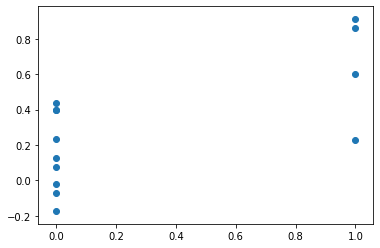

In [86]:
# Visualize predictions

plt.scatter(y, predictions)

In [93]:
# Evaluating the models

from sklearn.metrics import mean_squared_error, r2_score

In [94]:
print('Intercept: ', model.intercept_)
print('Slope: ', model.coef_)

Intercept:  3.857933005149098
Slope:  [-5.18729135e-02  6.02614157e-05]


In [95]:
rmse = (py.sqrt(mean_squared_error(y, predictions)))
r2 = r2_score(y, predictions)

print('Model Performance\n-------\n')
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

Model Performance
-------

RMSE is 0.32741183231050536
R2 score is 0.4967625599627806
